# Titanic - Machine Learning from disaster

## --------------------------------------------------------------------------------------------------------------------- 

## Load libraries

In [1]:
import pandas as pd
import kaleido
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Load data 

In [2]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Remove unwanted columns

train_data = train_data.drop(columns=['Name', 'Ticket'])
print(train_data.shape)
train_data.head(10)

(891, 10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,51.8625,E46,S
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,30.0708,NaN,C


In [4]:
# Display NaN values in each column

train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data = train_data.drop(columns=['Cabin'])
print(train_data.shape)
train_data.head(10)

(891, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


### Handle NaN values
- In 'Age' column
- In 'Embarked' column

In [6]:
# In 'Age' column

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [7]:
# In 'Embarked' column

train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [8]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Transforming columns with categorical data
- 'Sex' column
- 'Embarked' column

In [9]:
# 'Sex' column

train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
train_data['Sex'] = train_data['Sex'].replace('male', 1)
train_data['Sex'] = train_data['Sex'].replace('female', 0)

In [11]:
# 'Embarked' column

train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
train_data['Embarked'] = train_data['Embarked'].replace('S', 0)
train_data['Embarked'] = train_data['Embarked'].replace('C', 1)
train_data['Embarked'] = train_data['Embarked'].replace('Q', 2)

In [13]:
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
5,6,0,3,1,28.0,0,0,8.4583,2
6,7,0,1,1,54.0,0,0,51.8625,0
7,8,0,3,1,2.0,3,1,21.0750,0
8,9,1,3,0,27.0,0,2,11.1333,0
9,10,1,2,0,14.0,1,0,30.0708,1


## Train-Val split

In [14]:
X = train_data.drop(columns=['PassengerId', 'Survived'])
y = train_data['Survived']

X.shape, y.shape

((891, 7), (891,))

In [15]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
5,3,1,28.0,0,0,8.4583,2
6,1,1,54.0,0,0,51.8625,0
7,3,1,2.0,3,1,21.0750,0
8,3,0,27.0,0,2,11.1333,0
9,2,0,14.0,1,0,30.0708,1


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## SMOTE - Oversampling

In [17]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [18]:
# Plot the distribution
cat1 = train_data['Survived'].value_counts().to_dict()
cat2 = y.value_counts().to_dict()
classes = ['Not Survived', 'Survived']
counts1 = list(cat1.values())
counts2 = list(cat2.values())

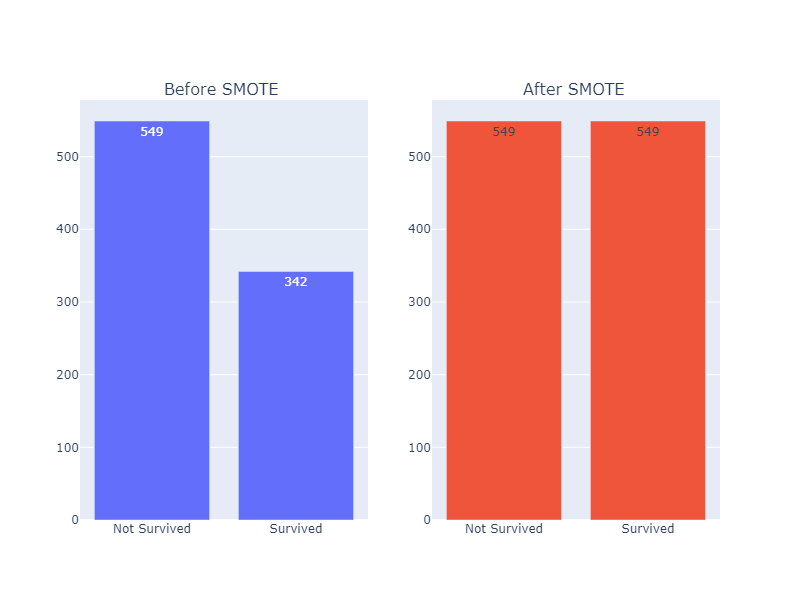

In [19]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Before SMOTE\n", "After SMOTE\n"))

fig.add_trace(
    go.Bar(
            x=classes, y=counts1,
            text=counts1,
            textposition='auto',
        ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
            x=classes, y=counts2,
            text=counts2,
            textposition='auto',
        ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False )
fig.show("png")

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train.shape, y_train.shape

((878, 7), (878,))

In [22]:
X_val.shape, y_val.shape

((220, 7), (220,))

## Model Selection
    - Logistic regression
    - Decision tree
    - Gradient boosting
    - Random forest
    - SVM

### Logistic regression

In [23]:
lr = LogisticRegression(random_state=42, max_iter=150)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

In [24]:
lr.score(X_val, y_val)

0.8318181818181818

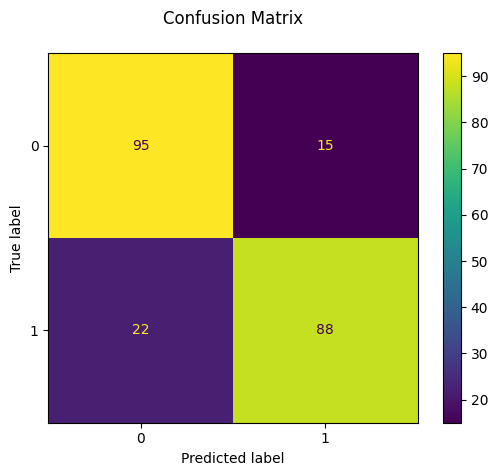

In [25]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_lr, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [26]:
# Classification report

print(metrics.classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.85      0.80      0.83       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



### Decision Tree

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

In [28]:
dt.score(X_val, y_val)

0.8363636363636363

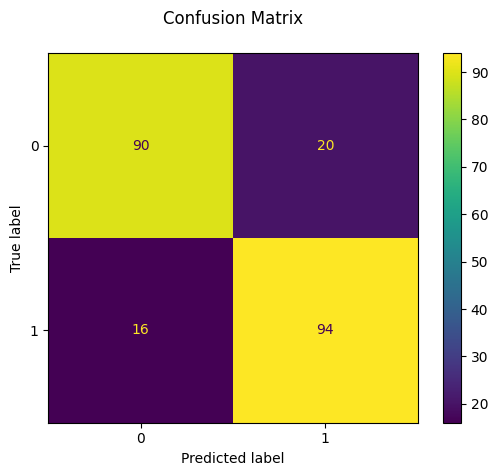

In [29]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_dt, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [30]:
# Classification report

print(metrics.classification_report(y_val, dt.predict(X_val)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       110
           1       0.82      0.85      0.84       110

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



### Gradient boosting

In [31]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

In [32]:
gb.score(X_val, y_val)

0.8272727272727273

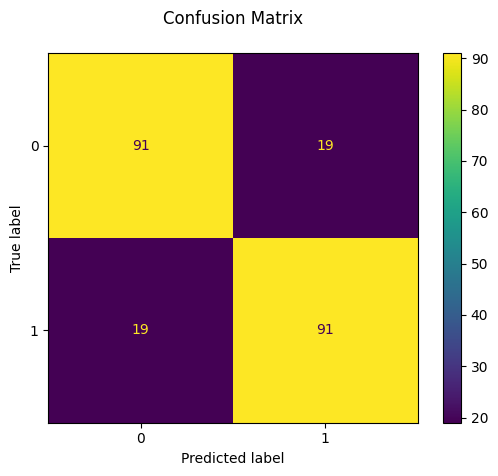

In [33]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_gb, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [34]:
# Classification report

print(metrics.classification_report(y_val, gb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.83      0.83      0.83       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



### Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, max_features=2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [36]:
rf.score(X_val, y_val)

0.8636363636363636

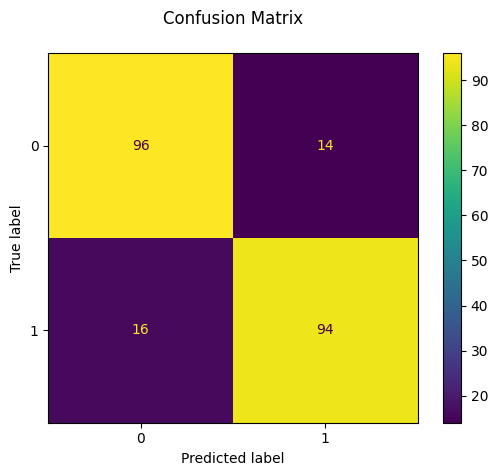

In [37]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_rf, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [38]:
# Classification report

print(metrics.classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.87      0.85      0.86       110

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



### SVM

In [39]:
svm = SVC(random_state=42, kernel="linear", )
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

In [40]:
svm.score(X_val, y_val)

0.7818181818181819

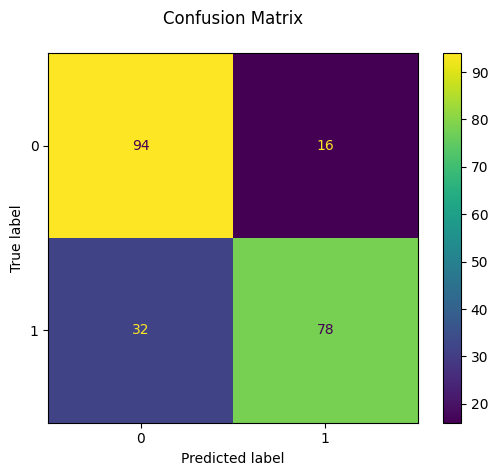

In [41]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_svm, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [42]:
# Classification report

print(metrics.classification_report(y_val, svm.predict(X_val)))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       110
           1       0.83      0.71      0.76       110

    accuracy                           0.78       220
   macro avg       0.79      0.78      0.78       220
weighted avg       0.79      0.78      0.78       220



## Score plot for all the models

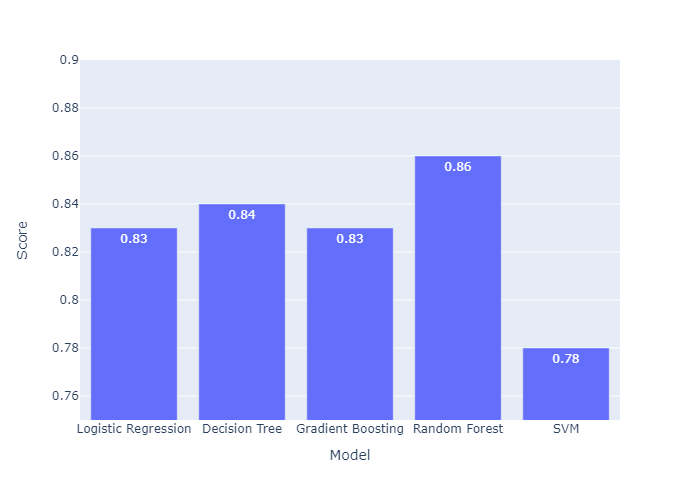

In [43]:
accuracy = {
    "Model": ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'SVM'],
    "Score": [round(lr.score(X_val, y_val), ndigits=2), round(dt.score(X_val, y_val), ndigits=2), 
              round(gb.score(X_val, y_val), ndigits=2), round(rf.score(X_val, y_val), ndigits=2),
              round(svm.score(X_val, y_val), ndigits=2)]
}

accuracy = pd.DataFrame(accuracy)

fig = px.bar(accuracy, x='Model', y='Score', text="Score")
fig.update_layout(yaxis_range=[0.75,0.9])
fig.show("png")

In [44]:
# Load test data

test_data = pd.read_csv('test.csv')
print(test_data.shape)
test_data.head(10)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Transform test data

In [45]:
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [46]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [47]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [48]:
test_data['Sex'] = test_data['Sex'].replace('male', 1)
test_data['Sex'] = test_data['Sex'].replace('female', 0)

In [49]:
test_data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [50]:
test_data['Embarked'] = test_data['Embarked'].replace('S', 0)
test_data['Embarked'] = test_data['Embarked'].replace('C', 1)
test_data['Embarked'] = test_data['Embarked'].replace('Q', 2)

In [51]:
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
5,3,1,14.0,0,0,9.2250,0
6,3,0,30.0,0,0,7.6292,2
7,2,1,26.0,1,1,29.0000,0
8,3,0,18.0,0,0,7.2292,1
9,3,1,21.0,2,0,24.1500,0


In [52]:
y_pred_test = rf.predict(test_data)

## Prepare submission file

In [53]:
test_data = pd.read_csv('test.csv')
sub = {
    "PassengerID": list(test_data['PassengerId']),
    "Survived": list(y_pred_test)
}
sub = pd.DataFrame(sub)
sub.to_csv("titanic_submission.csv", index=False)